***DATA CLEANING AND PREPROCCESSING :***

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


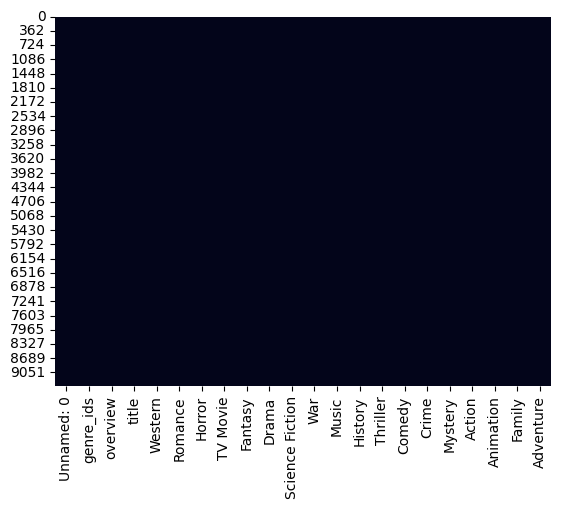

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, hamming_loss

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv("movies_genre.csv")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("movies_genre.csv")

# Drop rows missing critical information
df.dropna(subset=['overview', 'genre_ids'], inplace=True)

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [40]:
df = df.drop_duplicates(subset=['title', 'overview'])


In [41]:
df['overview_length'] = df['overview'].apply(lambda x: len(str(x).split()))
df = df[df['overview_length'] > 10]


In [66]:
# Check if 'release_date' column exists in DataFrame
if 'release_date' in df.columns:
    df['overview'] = df['overview'].astype(str)
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
else:
    print("Column 'release_date' not found in DataFrame")
    # Handle missing column, e.g., create a new one, skip this step, or investigate data source


Column 'release_date' not found in DataFrame


In [68]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df['genre_ids'].str.split(',')),
                          columns=mlb.classes_,
                          index=df.index))


In [69]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['clean_overview'] = df['overview'].apply(clean_text)


In [72]:
df['genre_ids'] = df['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


***EXPLORATORY DATA ANALYSIS***

<ipython-input-76-c78b275c9948>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_id_counts.index, y=genre_id_counts.values, palette="magma")


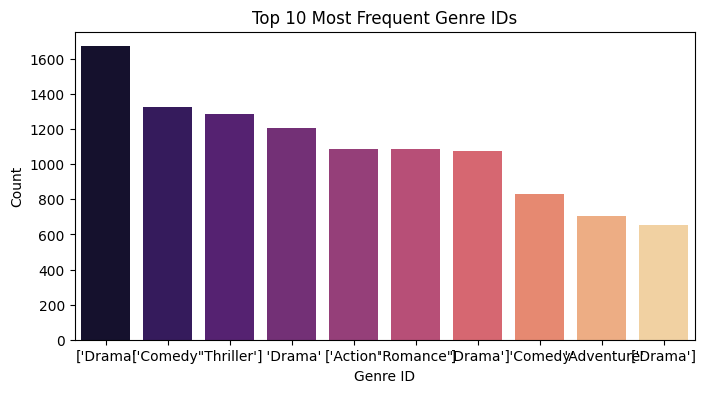

In [76]:
# Explode genre_ids
df['genre_ids'] = df['genre_ids'].astype(str)
genre_id_counts = df['genre_ids'].str.split(',').explode().value_counts().head(10)

# Plot the most frequent genre IDs
plt.figure(figsize=(8, 4))
sns.barplot(x=genre_id_counts.index, y=genre_id_counts.values, palette="magma")
plt.title("Top 10 Most Frequent Genre IDs")
plt.xlabel("Genre ID")
plt.ylabel("Count")
plt.show()


<ipython-input-79-4fd850baa4fb>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre_ID', y='overview_length', data=df_melt[df_melt['Presence'] == 1], palette='cool')


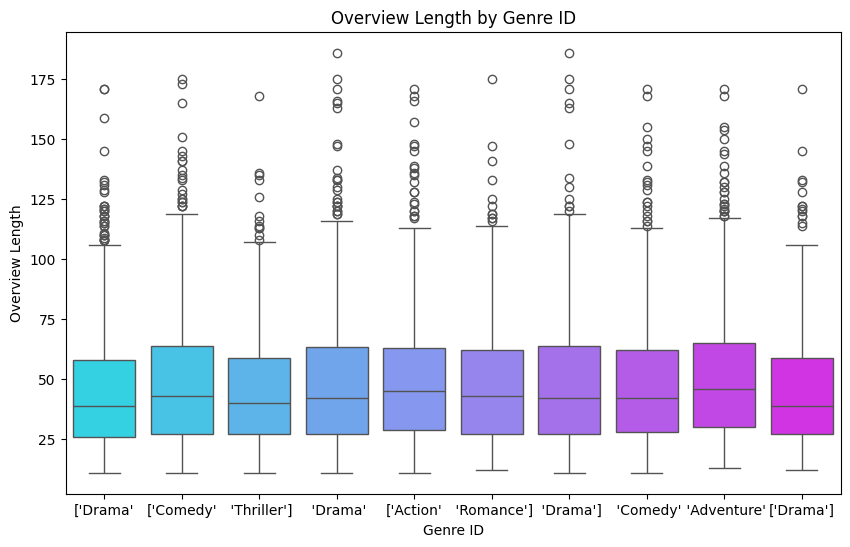

In [79]:
# Get top genre IDs
top_genres = genre_id_counts.index.tolist()

# Create flags for each top genre
for genre_id in top_genres:
    # Escape special characters in genre_id for regex
    genre_id_escaped = re.escape(str(genre_id))
    df[f'genre_{genre_id}'] = df['genre_ids'].str.contains(genre_id_escaped, regex=True).astype(int)

# Melt for boxplot
# ... (rest of your code remains the same)
# Melt for boxplot
df_melt = df.melt(id_vars='overview_length',
                  value_vars=[f'genre_{g}' for g in top_genres],
                  var_name='Genre_ID', value_name='Presence')

df_melt['Genre_ID'] = df_melt['Genre_ID'].str.replace('genre_', '')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre_ID', y='overview_length', data=df_melt[df_melt['Presence'] == 1], palette='cool')
plt.title("Overview Length by Genre ID")
plt.xlabel("Genre ID")
plt.ylabel("Overview Length")
plt.show()


***FEATURED ENGINEERING***

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score, hamming_loss

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
df = pd.read_csv("movies_genre.csv")
# ... (rest of your code) ...

# Cell #44 (Ensure this is run before cell #49)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['clean_overview'] = df['overview'].apply(clean_text)  # creates 'clean_overview' column

# ... (rest of your code) ...

# Cell #49
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_overview']) # This should now work as 'clean_overview' exists

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [51]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genre_ids'])


***MODEL TRAINING***

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
# Changed 'x' to 'X_tfidf' to use the TF-IDF features for model training.

In [59]:
# TF-IDF with fewer features
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_overview'])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Faster Logistic Regression
lr_model = OneVsRestClassifier(LogisticRegression(max_iter=500))
lr_model.fit(X_train, y_train)

# Lightweight Random Forest
rf_model = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label 15 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=RandomForestClassifier(n_estimators=10))

***MODEL EVALUATION***

In [62]:
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr, average='micro'))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf, average='micro'))
print("Hamming Loss (Random Forest):", hamming_loss(y_test, y_pred_rf))


Logistic Regression F1 Score: 0.8053794757580949
Random Forest F1 Score: 0.7725185446838573
Hamming Loss (Random Forest): 0.21409574468085107


***VISUALISATION***

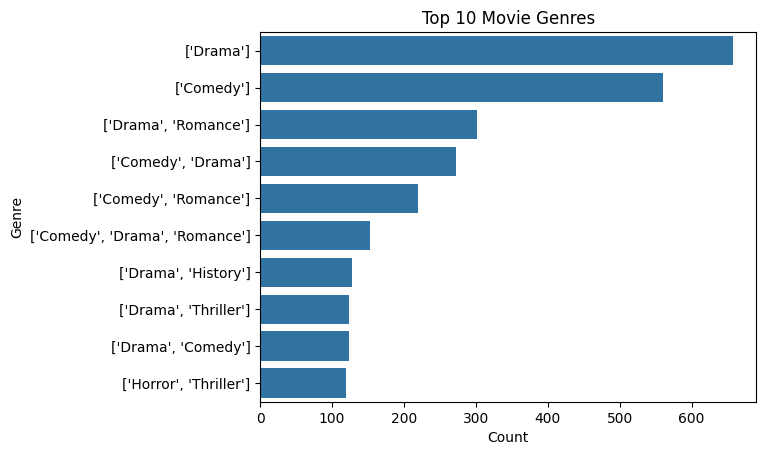

In [61]:
genre_counts = df['genre_ids'].explode().value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


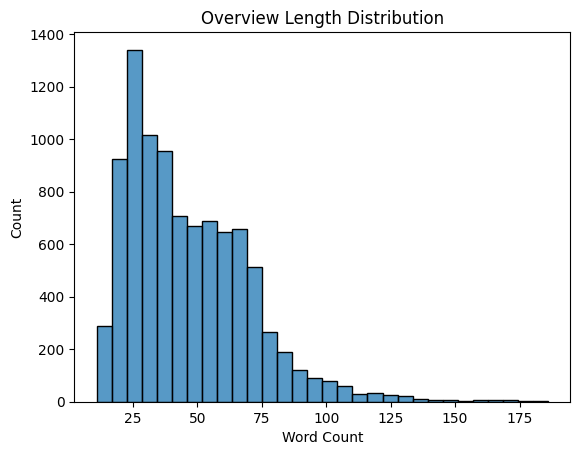

In [64]:
# Cell #63 (Visualization)

# Recalculate 'overview_length' if it doesn't exist
if 'overview_length' not in df.columns:  # Check if column exists
    df['overview_length'] = df['overview'].apply(lambda x: len(str(x).split()))
    df = df[df['overview_length'] > 10]  # Filter if necessary


sns.histplot(df['overview_length'], bins=30)  # Now 'overview_length' should exist
plt.title('Overview Length Distribution')
plt.xlabel('Word Count')
plt.show()